# Projeto de Machine Learning Extra!

**Objetivo**: Através dos Dados do Censo detectar se a renda da pessoa excede o valor de 50 mil por ano.

**Habilidades Avaliadas**: 
* Técnicas de Transformação e Preparação de dados
* Aplicação, Avaliação e Tunning de Modelos de Machine Learning para Classificação.

**Dataset**: O conjunto de dados para este projeto é originário do Repositório de Aprendizado de Máquina da UCI (https://archive.ics.uci.edu/ml/datasets/Adult)

In [ ]:
# Parte do código escrito aqui foi retirado do Notebook da Karinne para o mesmo projeto:
https://github.com/karinnecristina/Data-Science/blob/master/Projeto%20minerando%20dados/Dados_do_Censo.ipynb

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder            # Pre processamento dos dados, converter dados categóricos em numéricos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pickle


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CienciaDados/ModExtra1/ProjetoML01/Materiais_de_Apoio_ProjetoML01/adult.data')

## Conhecendo a Base de Dados

In [ ]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.count()

age                48842
workclass          48842
education          48842
educational-num    48842
marital-status     48842
occupation         48842
relationship       48842
race               48842
sex                48842
capital-gain       48842
capital-loss       48842
hours-per-week     48842
native-country     48842
income             48842
dtype: int64

In [ ]:
df.describe() # Variáveis numéricas.

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Variáveis categóricas.
df.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   sex              48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   48842 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [ ]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [ ]:
# Se quisesse separar o age em classes, poderia usar o valor pd.qcut

df['age_classified'] = pd.cut(
    df['age'],
    3,
    labels=['Young', 'Adult', 'Senior']
)

# método cut separa os atributos em bins, usando o dataset floors, separando em 5 bins com os labels muito pequeno...muito grande e criando uma nova coluna no dataset
# chamada floors_labels com essa informação, como pode ser visto no comando head.

O cut escolherá os compartimentos a serem uniformemente espaçados de acordo com os valores em si e não com a frequência desses valores.

Se você tem 30 registros por exemplo o número de registros de cada compartimento não será o mesmo um pode ficar com 0 outro com 2 e assim por diante. 

Já no qcut os compartimentos terão o mesmo número de registros, usando o exemplo de 30 valores, serão criados 5 compartimentos com 6 valores cada. Portanto, o qcut garante uma distribuição mais uniforme dos valores em cada bin, mesmo se eles se agruparem no espaço de amostra. Isso significa que você tem menos chances de ter uma compartimento cheio de dados com valores muito próximos e outra compartimento com valores 0. 

Em geral, o qcut é a melhor opção. 

In [ ]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_classified
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,Young
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,Young
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,Young
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,Adult
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,Young


In [ ]:
df['age_classified'].unique()
# com o método unique ele traz apenas uma vez, sem esse método ele repete quantas vezes aparecerem na base de dados.

['Young', 'Adult', 'Senior']
Categories (3, object): ['Young' < 'Adult' < 'Senior']

In [ ]:
df['age_classified']

0        Young
1        Young
2        Young
3        Adult
4        Young
         ...  
48837    Young
48838    Young
48839    Adult
48840    Young
48841    Adult
Name: age_classified, Length: 48842, dtype: category
Categories (3, object): ['Young' < 'Adult' < 'Senior']

##### contagem de valores em cada bin ou categoria

In [ ]:
df['age_classified'].value_counts()

#resultado da discretização dos valores numéricos em valores categóricos.

Young     29866
Adult     17173
Senior     1803
Name: age_classified, dtype: int64

## Colunas do Dataset

**age**: Idade.

**workclass**: Classe trabalhadora. Se a pessoa é funcionário público, autônomo, empresário etc.

**education**: Níveis de Escolaridade.

**education-num**: Código do Nível de Escolaridade.

**marital-status**: Estado Civil.

**occupation**: Ocupação (Suporte técnico, Conserto de arte, Outros serviços, Vendas, Exec-managerial, Prof-specialty, Manipuladores de limpeza, Machine-op-inspct, Adm-clerical, Pesca agropecuária, Transport-moving, Priv-house-serv, Serviço de Proteção, Forças Armadas)

**relationship**: Relacionamento (Esposa, Filha Própria, Marido, Não-familiar, Outro-parente, Solteira.)

**race**: Raça (Preto, branco, asiático-Pac-Islander, Amer-Indian-Eskimo, Outro.)

**sex**: Sexo(Feminino, Masculino).

**capital-gain**: Ganho de Capital.

**capital-loss**: Perda de Capital.

**hours-per-week**: Horas de trabalho por Semana.

**native-country**: País Nativo (Estados Unidos, Camboja, Inglaterra, Porto Rico, Canadá, Alemanha, EUA (Guam-USVI-etc), Índia, México, Portugal etc)

# Tarefas

####  <span style="color:Blue">  Análise Exploratória </span>
1) Faça análise exploratória na base de dados e tente responder as seguintes questões:

* **a)** Visualize a distribuição das classes (variável income).
* **b)** Visualize a distribuição das classes por Nível de Escolaridade.
* **c)** Visualize a relação (scatter) das colunas age,sex e race com a coluna income.

**Como fazer?**

Para isso, você precisa como pré-requisito o conhecimento de Python e Pandas que são mostrados nos capítulos **Dominando o Python** e **Python para Análise de Dados**. 

Nas aulas de Pandas assista principalmente a parte onde é exibida a integração com Matplotlib.

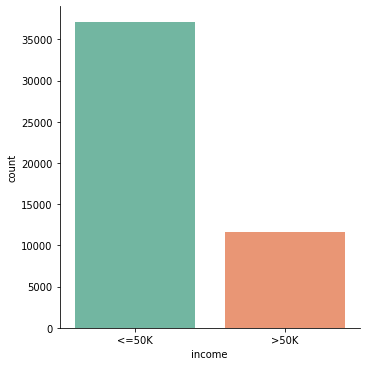

In [ ]:
sns.catplot(x='income', kind='count', palette='Set2', data=df);

In [ ]:
df.income.value_counts()
# We have approx 3 times more persons with incomes under 50k.

<=50K    37155
>50K     11687
Name: income, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

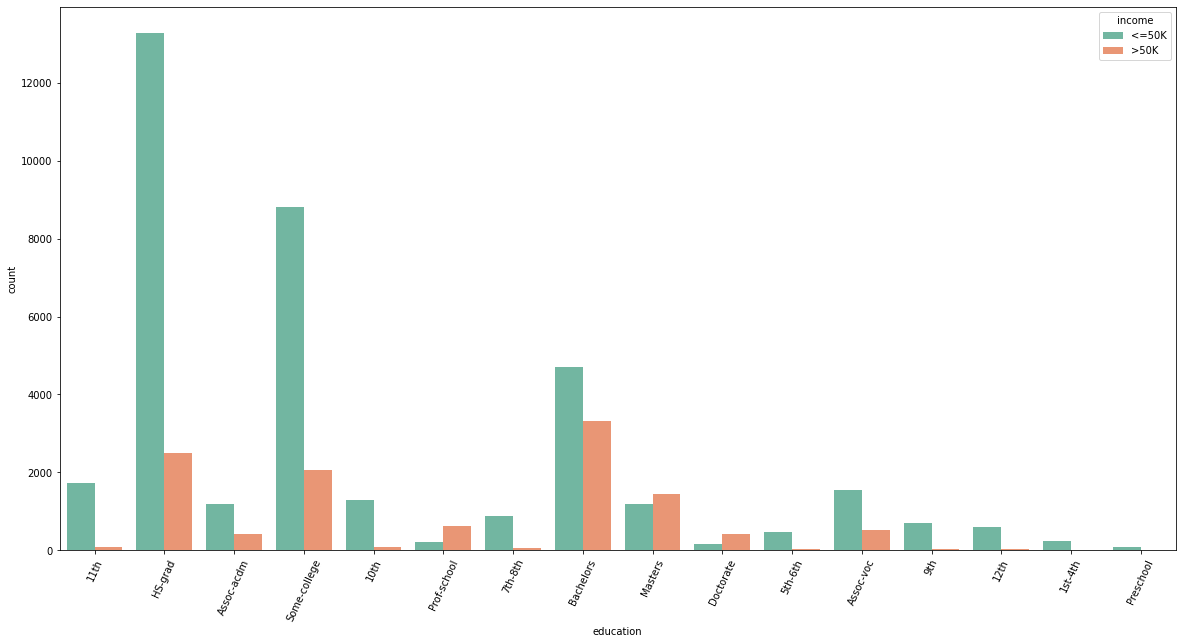

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x = 'education', palette='Set2', hue = 'income')
plt.xticks(rotation=65)

In [ ]:
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

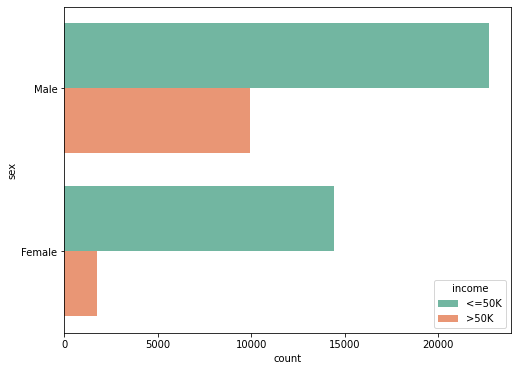

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, y = 'sex', palette='Set2', hue = 'income')


In [ ]:
df.sex.value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

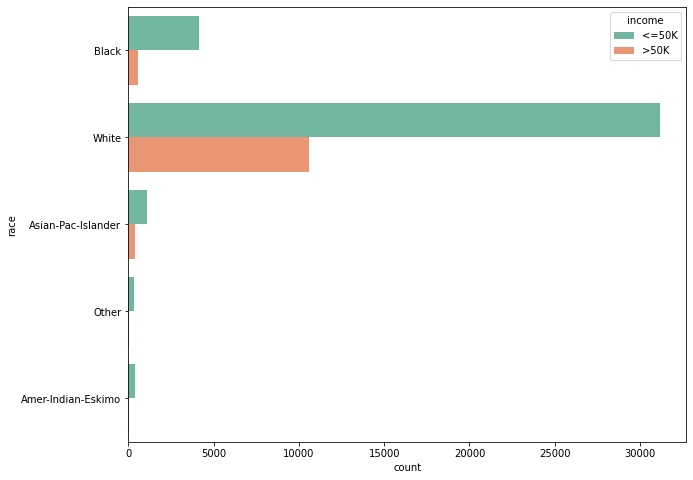

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, y = 'race', palette='Set2', hue = 'income')

In [ ]:
df.race.value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]), <a list of 74 Text major ticklabel objects>)

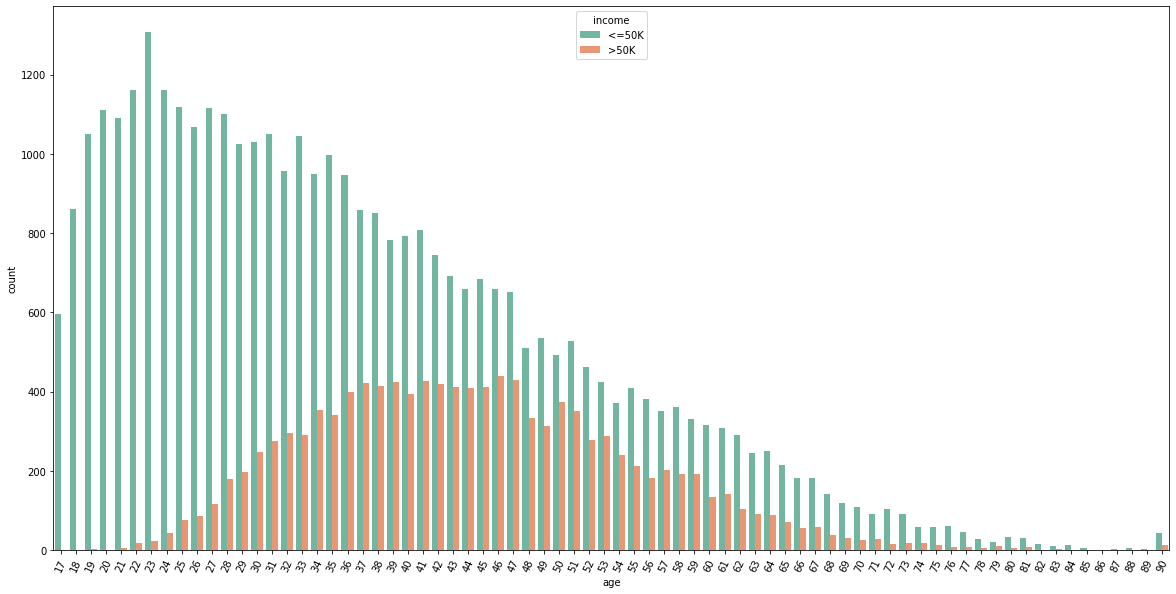

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x = 'age', palette='Set2', hue = 'income')
plt.xticks(rotation=65)

In [ ]:
# Verificando a idade mínima e máxima do dataset.
print(f'A idade mínima é: {df.age.min()} anos')
print(f'A idade máxima é: {df.age.max()} anos')

A idade mínima é: 17 anos
A idade máxima é: 90 anos


In [ ]:
# Criando uma função para processamento de dados.
def categorize(a): # função categorize receives age value
  if a >=50:
      return 'Old'
  elif a >= 25:
      return 'Adult'
  elif a < 25:
      return 'Young'

In [ ]:
# Incluindo nova coluna no DF com nome 'age_cat' e mesmos valores de age.
df['age_cat'] = df['age']

In [ ]:
# Aplicando as categorias na nova coluna

df['age_cat'] = df['age'].apply(categorize)

In [ ]:
# Sugestão dada no Slack do minerando:

"""
df2['age_tag'] = 'adult'
df2.loc[df['age']<25,'age_tag'] = 'Young'
df2.loc[df['age']>50,'age_tag'] = 'Old'
"""

"""Olá, Paulo. Veja que vc usou o índice i na hora de executar o for, mas na hora de atribuir a categoria vc não está utilizando o i. Acredito que vc teria mais sucesso com o método .loc() ou apply(). 
Se for usar o apply, vc poderia criar uma função que recebesse um número e retornasse 'young', 'old' ou 'adult' conforme as condições que vc fez.
"""

"Olá, Paulo. Veja que vc usou o índice i na hora de executar o for, mas na hora de atribuir a categoria vc não está utilizando o i. Acredito que vc teria mais sucesso com o método .loc() ou apply(). \nSe for usar o apply, vc poderia criar uma função que recebesse um número e retornasse 'young', 'old' ou 'adult' conforme as condições que vc fez.\n"

In [ ]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_classified,age_cat
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,Young,Adult
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,Young,Adult
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,Young,Adult
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,Adult,Adult
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,Young,Young


Text(0, 0.5, 'Quantity')

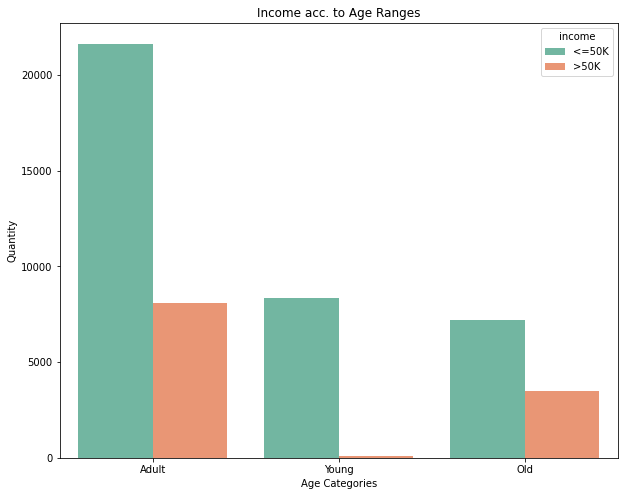

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x = 'age_cat', palette='Set2', hue = 'income').set(title='Income acc. to Age Ranges')
plt.xlabel("Age Categories")
plt.ylabel("Quantity") 

# Solução da Karinne para o gráfico.

In [ ]:
"""
# Para uma melhor visualização vamos agrupar as idades em 3 categorias:
# 0-25 anos (jovens)
# 25-50 anos (adultos)
# 50-100 anos (idosos)
df2['age'] = pd.cut(df['age'],[0,25,50,100], labels =['young','adult','old'])

# Verificando como ficou a distribuição.
plt.figure(figsize=(8,6))
sns.countplot(data=df, x = 'age',  hue = 'income')
plt.xticks(rotation=70)
"""

"\n# Para uma melhor visualização vamos agrupar as idades em 3 categorias:\n# 0-25 anos (jovens)\n# 25-50 anos (adultos)\n# 50-100 anos (idosos)\ndf2['age'] = pd.cut(df['age'],[0,25,50,100], labels =['young','adult','old'])\n\n# Verificando como ficou a distribuição.\nplt.figure(figsize=(8,6))\nsns.countplot(data=df, x = 'age',  hue = 'income')\nplt.xticks(rotation=70)\n"

In [ ]:
# Trasnformando as variáveis categóricas em numéricas.
cols = df[df.select_dtypes(['object']).columns]

for c in cols:
    encoding = LabelEncoder()
    encoding.fit(list(df[c].values))
    df[c] = encoding.transform(list(df[c].values))
df = pd.get_dummies(df)

In [ ]:
df.head()
# Todas as categorias estão como numéricas.

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_cat,age_classified_Young,age_classified_Adult,age_classified_Senior
0,25,4,1,7,4,7,3,2,1,0,0,40,39,0,0,1,0,0
1,38,4,11,9,2,5,0,4,1,0,0,50,39,0,0,1,0,0
2,28,2,7,12,2,11,0,4,1,0,0,40,39,1,0,1,0,0
3,44,4,15,10,2,7,0,2,1,7688,0,40,39,1,0,0,1,0
4,18,0,15,10,4,0,3,4,0,0,0,30,39,0,2,1,0,0


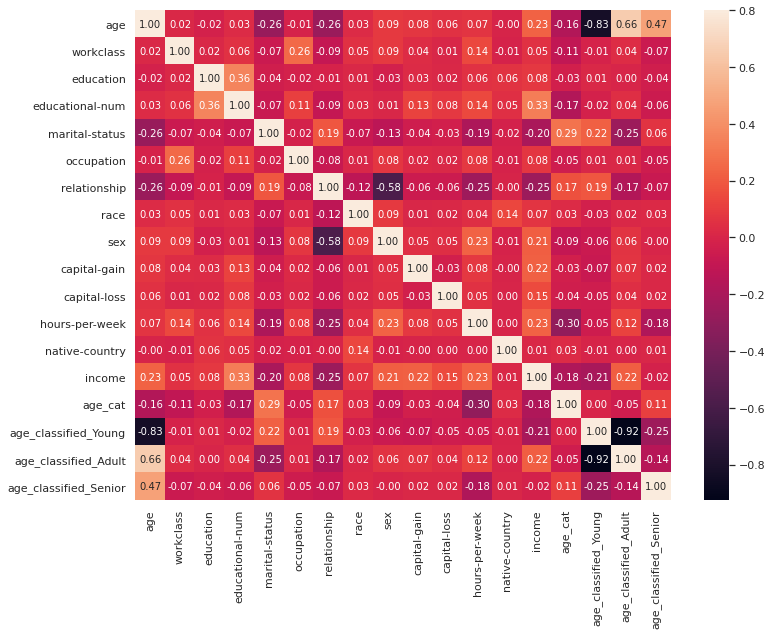

In [ ]:
# Possibilita a análise simultânea da associação entre variáveis.
corr = df.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 10}, annot=True, fmt='.2f')

In [ ]:
corr_list = corr['income'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

# Poderia dropar as colunas com correlação inferior a 0.10 por ex???

educational-num          0.332613
age                      0.230369
hours-per-week           0.227687
capital-gain             0.223013
age_classified_Adult     0.220392
sex                      0.214628
capital-loss             0.147554
education                0.080091
occupation               0.076722
race                     0.070934
workclass                0.052674
native-country           0.012210
age_classified_Senior   -0.018942
age_cat                 -0.181579
marital-status          -0.199072
age_classified_Young    -0.208568
relationship            -0.253214
Name: income, dtype: float64

####  <span style="color:Blue">  Verificação e Análise de Dados </span>
2) Faça uma análise e pre-processamento nos dados:

* **a)** Verifique se existem dados missing.
* **b)** Converta colunas categóricas para numéricas usando **LabelEnconder** ou **OneHotEnconder**.
* **c)** Explique qual técnica de conversão você usou e por quê.

**Como fazer?**

Para visualizar dados missing consulte o capítulo **Python para Análise de Dados**.

Para converter dados categóricos veja as seguintes aulas sobre LabelEncoder e One Hot Enconder no Capítulo de Machine Learning:
* **SVM - Criando um Classificador de Músicas do Spotify - Aula 07**

> Através do exemplo prático mostramos como funciona a técnica Label Encoding com suas vantagens e desvantagens e como aplicar na base de dados.

* **SVM - Processando Dados Categóricos com o One hot Enconding- Aula 08**
> Nesta aula você irá entender os conceitos do One Hot Encoding e as alterações que serão feitas na base de dados.

* **SVM - Aplicando o Get Dummies nos Dados - Aula 09**
> Por fim, na aula 09 aplicamos o One Hot Enconding na base de dados utilizando o método get_dummies() conforme cobrado no exemplo acima.

In [ ]:
# Missing Values
df.isnull().sum()

age                      0
workclass                0
education                0
educational-num          0
marital-status           0
occupation               0
relationship             0
race                     0
sex                      0
capital-gain             0
capital-loss             0
hours-per-week           0
native-country           0
income                   0
age_cat                  0
age_classified_Young     0
age_classified_Adult     0
age_classified_Senior    0
dtype: int64

In [ ]:
# Verificando a quantidade de valores nulos no dataset.
total = df.isnull().sum().sort_values(ascending=False)
percent = df.isnull().sum()/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, sort=False, keys=['total', 'percent'])
missing_data[missing_data['percent']!=0]

,total,percent


# Aplicando o Label Encoder

In [ ]:
features = df                                                                            # criando novo dataframe para armazenar as features com dados numéricos.
Cat_Colums = features.dtypes.pipe(lambda features: features[features=='object']).index   # variável para filtrar todos os atributos object (dados categóricos no pandas) pois nos dados originais também temos dados numéricos já existentes.
for col in Cat_Colums:                                                                   # para cada coluna executamos o label encoder e transformamos o objeto de categórico para numérico.
    label = LabelEncoder()                                                               # o label encoder transforma cada dado categórico em um dado numérico diferente.
    features[col] = label.fit_transform(features[col])

In [ ]:
def remove_features(lista_features):
    for i in lista_features:
        features.drop(i, axis=1, inplace=True)
    return print('ok, removida(s)')

In [ ]:
remove_features(['age_cat'])

ok, removida(s)


In [ ]:
features.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_classified_Young,age_classified_Adult,age_classified_Senior
0,25,4,1,7,4,7,3,2,1,0,0,40,39,0,1,0,0
1,38,4,11,9,2,5,0,4,1,0,0,50,39,0,1,0,0
2,28,2,7,12,2,11,0,4,1,0,0,40,39,1,1,0,0
3,44,4,15,10,2,7,0,2,1,7688,0,40,39,1,0,1,0
4,18,0,15,10,4,0,3,4,0,0,0,30,39,0,1,0,0


# Aplicando o One Hot Encoder

* O One Hot Encoder transforma cada valor categórico único em uma coluna e essa coluna vai ter valor 1 ou 0.
* Resolve o problema de **ordenação** do LabelEnconder.

# Quais colunas aplicar o OHE? 

* o OHE resolve a problema da ordenação do label encoder, por exemplo na linha educaction ele vai classificar de 1 a 16 e os algoritmos de ML podem entender que o 1 é muito melhor (ou pior) que o 16 sem ter uma relação verídica. o 1 poderia ser PHD e o 16 Doctorate por exemplo e o classificador entender que a distância entre os dois seja muito grande.

* Ao aplicar o Label Encoder podemos criar um problema de ordenação.

In [ ]:
# Lendo o data frame novamente para aplicar o OHE:
df = pd.read_csv('/content/drive/MyDrive/CienciaDados/ModExtra1/ProjetoML01/Materiais_de_Apoio_ProjetoML01/adult.data')
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Separa a clase target do dataframe


In [ ]:
classes = df['income']
df.drop('income', axis=1, inplace=True)
#vamos salvar a coluna income que é a renda.

In [ ]:
set(classes)

{'<=50K', '>50K'}

## Pré-Processamento de dados - removendo as colunas "desnecessárias".

In [ ]:
# função para remover uma lista de features que não sejam úteis no momento.
# se a função executar corretamente ela retorna 0

def remove_features(lista_features):
    for i in lista_features:
        df.drop(i, axis=1, inplace=True)
    return 0

In [ ]:
# Remove features, poderiamos remover mais colunas, porém decidi remover somente estas.
remove_features(['native-country', 'education'])

0

In [ ]:
df.head()
# Colunas race e sex são categóricas.

,age,workclass,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40
4,18,?,10,Never-married,?,Own-child,White,Female,0,0,30


# Get dummies transformando as variáveis categóricas em colunas binárias.

In [ ]:
# Aplicando o get_dummies nos dados.
df = pd.get_dummies(df, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week'], prefix=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week'])

#variável dataset vai receber o conteúdo dela própria informando a coluna que será processada e o prefixo, ou seja, toda coluna gerada terá o prefixo artista

In [ ]:
# Visualizando 'features' geradas.
df.columns

Index(['age', 'educational-num', 'capital-gain', 'capital-loss', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       ...
       'hours-per-week_89', 'hours-per-week_90', 'hours-per-week_91',
       'hours-per-week_92', 'hours-per-week_94', 'hours-per-week_95',
       'hours-per-week_96', 'hours-per-week_97', 'hours-per-week_98',
       'hours-per-week_99'],
      dtype='object', length=144)

In [ ]:
len(df.columns) 
# agora temos 144 colunas ao invés de 14

144

In [ ]:
# Visualizando as colunas
df.dtypes
#colunas categóricas são todas do tipo uint8

age                  int64
educational-num      int64
capital-gain         int64
capital-loss         int64
workclass_?          uint8
                     ...  
hours-per-week_95    uint8
hours-per-week_96    uint8
hours-per-week_97    uint8
hours-per-week_98    uint8
hours-per-week_99    uint8
Length: 144, dtype: object

In [ ]:
# checando missing values
df.isnull().sum()
#não temos valores nulos.

age                  0
educational-num      0
capital-gain         0
capital-loss         0
workclass_?          0
                    ..
hours-per-week_95    0
hours-per-week_96    0
hours-per-week_97    0
hours-per-week_98    0
hours-per-week_99    0
Length: 144, dtype: int64

# No exercício haviam vários valores nulos. Código da Karine para preencher os valores nulos.

In [20]:
# Verificando a quantidade de valores nulos no dataset.
total = df.isnull().sum().sort_values(ascending=False)
percent = df.isnull().sum()/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, sort=False, keys=['total', 'percent'])
missing_data[missing_data['percent']!=0]
Out[20]:
total	percent
occupation	2809	0.057512
workclass	2799	0.057307
native-country	857	0.017546
In [ ]:

In [21]:
# Preenchendo os valores nulos da coluna 'workclass'.
top = 'Private'
df['workclass'] = df['workclass'].fillna(top)
In [22]:
# Preenchendo os valores nulos da coluna 'occupation'.
top = 'United-States'
df['occupation'] = df['occupation'].fillna(top)
In [23]:
# Preenchendo os valores nulos da coluna 'native-country'.
top = 'Prof-specialty'
df['native-country'] = df['native-country'].fillna(top)
In [24]:
# Verificando se ainda existem valores nulos no Dataset.
if df.isnull().sum().sort_values(ascending=False).any() != 0:
    print(f'Existe valores nulos no dataset? {True}')
else:
    print(f'Existe valores nulos no dataset? {False}')

####  <span style="color:Blue">  Pré-processamento de Dados </span>

3) Faça um pré-processamento nos dados antes de aplicar os algoritmos de Machine learning.

* **a)** Aplique algum padronizador ou normalizador nos dados numéricos.
* **b)** Explique qual técnica você usou e por quê.

**Como Fazer?**

Nesta etapa são feitas transformações nos atributos númericos para evitar que os algoritmos de Machine Learning sofram com diferentes escalas de valores e produzam resultados ruins.

Explicamos essas tranformações em detalhes no capítulo **Pré-Processamento de Dados**. 

Aprendemos o funcionamento e aplicação do **MinMax Scaler**, **Standard Scaler**, **Normalizer** etc.

Assista essas aulas e aplique alguma das técnicas citadas acima.

# Pré processamento de dados é fundamental para todos os projetos de Machine Learning

* Erros nas coletas dos dados podem gerar anomalias.

* Através da **discretização** podemos transformar dados numéricos em categóricos, por exemplo uma tabela de alturas convertida em alto, média, baixo, idade em jovem, adulto, idoso...

* Através da **normalização** aplicaremos a mesma norma aos dados.

* Standarization faz uma re-escala dos dados dentro de uma faixa com base em critérios definidos. Coloca os dados com média próximo de 0 e Desvio Padrão próximo de 1. Muito importante para algorítmos de **clusterização e baseados em distância**.






---
https://datascience.stackexchange.com/questions/45900/when-to-use-standard-scaler-and-when-normalizer
# Also, when features have different units, e.g. (height,age,income), Normalizer is not used as a pre-processing step.

# As mentioned in this answer, Normalizer is mostly useful for controlling the size of a vector in an iterative process, e.g. a parameter vector during training, to avoid numerical instabilities due to large values.
answer = https://datascience.stackexchange.com/a/45932/67328


---


# Decidi usar a Standard Scaler:

# Padroniza a escala dos dados sem interferir na sua forma.

# Mantém a escala dos dados mais fiel que a Técnica MinMaxScale

---


####  <span style="color:Blue">  Classificação e Avaliação de Modelos </span>

4) Treine pelo menos dois algoritmos supervisionados voltados para tarefas de classificação.

* **a)** Avalie os modelos separando os dados de **treino** e **teste** (use train_test_split).
* **b)** Avalie os modelos usando **Cross Validation** (Crie uma função para repetir menos código).
* **c)** Explique a diferença entre de cada uma das abordagens acima com suas vantagens e desvantagens.
* **d)** Imprima os resultados para cada modelo e abordagem de avaliação utilizando as métricas **Precisão**, **Recall** e **F1 Score**.

**Como fazer?**

Todos os requisitos necessários para completar as etapas dessa tarefa se encontram no capítulo de Machine Learning.

Para o entendimento completo das **Técnicas de Avaliação de Modelos** cobradas, veja as aulas:
* **Machine Learning  - Métricas de Avaliação de Modelos** 
* **Machine Learning  - Entendendo o que é a Matriz de Confusão**.

# Utilizando train test split para separação dos dados de treino e teste.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, classes, test_size=0.20, random_state=20)

In [ ]:
X_train.shape, X_test.shape

((39073, 144), (9769, 144))

In [ ]:
y_train.shape, y_test.shape

((39073,), (9769,))

# Instanciando os classificadores e preparando os dados com o método fit.



---
# Algoritmos de classificação:

Logistic Regression.
Naïve Bayes.
Stochastic Gradient Descent.
K-Nearest Neighbours.
Decision Tree.
Random Forest.
Support Vector Machine.

---





In [ ]:
clf_rf = RandomForestClassifier(random_state=11).fit(X_train, y_train)
clf_dtc = DecisionTreeClassifier(random_state=11).fit(X_train, y_train)
clf_knn = KNeighborsClassifier().fit(X_train, y_train)

# Podem ser usados também...

# clf_lr = LogisticRegression()
# clf_nb = GaussianNB()
# clf_svc = svm.SVC()

# Random Forest

In [ ]:
# Função que retorna a acurácia após fazer um validação cruzada (cross validation)
inc = ['<=50K', '>50K']
def Acuracia(clf,X,y):
  resultado = cross_val_predict(clf, X, y, cv=10)
  return print (metrics.classification_report(y, resultado, inc)) #aqui estamos criando a acruácia de acordo com os valores reais (y) e os valores encontrados (resultados)

# Árvore de Decisão

In [ ]:
Acuracia(clf_dtc, X_test, y_test)

              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.87      7385
        >50K       0.61      0.60      0.61      2384

    accuracy                           0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769



# Random Forest

In [ ]:
Acuracia(clf_rf, X_test, y_test)

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7385
        >50K       0.71      0.61      0.66      2384

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



# KNN

In [ ]:
Acuracia(clf_knn, X_test, y_test)

              precision    recall  f1-score   support

       <=50K       0.89      0.91      0.90      7385
        >50K       0.69      0.64      0.66      2384

    accuracy                           0.84      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.84      0.84      9769



# Utilizando Cross Validation

---
# O objetivo da cross validation é eliminar o problema que o train test split pode causar de ter dados muito semelhantes em treino e teste.
# Conjuntos muito semelhantes vão mascarar o desempenho real do modelo em produção.
# Ao treinar e testar o modelo com todo o dado disponível o modelo se torna mais confiável.
---



####  <span style="color:Blue"> Tunning do Modelo </span>

5) Faça um Tunning dos modelos e verifique o melhor resultado.

* Defina os melhores Hyperparametros para os algoritmos utilizando o GridSearch.
* Implemente usando Pipelines.
* Avalie os modelos usando **Cross Validation** (Utilize o recuso já integrado ao Pipeline).

**Como fazer?**

Consulte o capítulo **Machine Learning** e utilize o recurso de **GridSearch**.

Veja as aulas sobre **Pipelines** e **Métricas de Avaliação de Modelos**.

# Tunning Random Forest 

In [ ]:
# # Definindo a escala
scaler = StandardScaler()
df = scaler.fit_transform(df)

# Possíveis valores de estimators
val_estimators = [75, 100, 125]

# Possíveis valores para o critério de divisão
val_criterion = ['gini', 'entropy']

# Definindo um dicionário que recebe as listas de parâmetros e valores
parametros_grid = dict(n_estimators = val_estimators,
                       criterion = val_criterion)
                      
                       
# Criando o modelo
modelo_random = RandomForestClassifier()

# Definindo K
kfold = StratifiedKFold(n_splits=11, shuffle = True, random_state=11)

# Testando diferenets combinações com os parâmetros
grid = RandomizedSearchCV(estimator = modelo_random, param_distributions = parametros_grid, cv = kfold, scoring = 'accuracy')
grid.fit(df, classes)

# Print do resultado
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print(f'mean:{mean},std:{std},params:{params}')
print()
print(f'Melhor parâmetro:{grid.best_params_}, Score:{grid.best_score_}')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Grid scores on development set:
mean:0.84947,std:0.00557,params:{'n_estimators': 75, 'criterion': 'gini'}
mean:0.84902,std:0.0042,params:{'n_estimators': 100, 'criterion': 'gini'}
mean:0.84884,std:0.00468,params:{'n_estimators': 125, 'criterion': 'gini'}
mean:0.84849,std:0.00436,params:{'n_estimators': 75, 'criterion': 'entropy'}
mean:0.84919,std:0.00563,params:{'n_estimators': 100, 'criterion': 'entropy'}
mean:0.84925,std:0.00458,params:{'n_estimators': 125, 'criterion': 'entropy'}

Melhor parâmetro:{'n_estimators': 75, 'criterion': 'gini'}, Score:0.8494741271537037


# Tunning Decision Tree

In [ ]:
# Vamos agora ajustar os parâmeros do DecisionTree.

# Definindo a escala
scaler = StandardScaler()
df = scaler.fit_transform(df)

# Definindo a profundidade máxima da árvore.
max_depth = list(range(1, 31))

# Possíveis valores para o critério de divisão
val_criterion = ['gini', 'entropy']


# Definindo um dicionário que recebe as listas de parâmetros e valores
valores_grid = dict(criterion = val_criterion,
                    max_depth = max_depth)

# Criando o modelo
modelo_tree = DecisionTreeClassifier()

# Definindo K
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=11)

# Testando diferenets combinações com os valores de K
grid = RandomizedSearchCV(estimator = modelo_tree, param_distributions = valores_grid, cv = kfold, scoring = 'accuracy')
grid.fit(df, classes)

# Print do resultado  
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print(f'mean:{mean},std:{std},params:{params}')
print()
print(f'Melhor parâmetro:{grid.best_params_}, Score:{grid.best_score_}')

Grid scores on development set:
mean:0.85242,std:0.00299,params:{'max_depth': 17, 'criterion': 'entropy'}
mean:0.83774,std:0.00417,params:{'max_depth': 27, 'criterion': 'gini'}
mean:0.85017,std:0.00449,params:{'max_depth': 5, 'criterion': 'entropy'}
mean:0.82589,std:0.0076,params:{'max_depth': 2, 'criterion': 'entropy'}
mean:0.85429,std:0.00413,params:{'max_depth': 6, 'criterion': 'gini'}
mean:0.8412,std:0.00267,params:{'max_depth': 25, 'criterion': 'entropy'}
mean:0.84968,std:0.0041,params:{'max_depth': 20, 'criterion': 'entropy'}
mean:0.83971,std:0.00389,params:{'max_depth': 29, 'criterion': 'entropy'}
mean:0.85512,std:0.00422,params:{'max_depth': 8, 'criterion': 'gini'}
mean:0.83864,std:0.00347,params:{'max_depth': 30, 'criterion': 'entropy'}

Melhor parâmetro:{'max_depth': 8, 'criterion': 'gini'}, Score:0.8551249416346653


# Tunning KNN

In [ ]:
"""
# Vamos agora ajustar os parâmeros do KNN.

# Definindo a escala
scaler = StandardScaler()
df = scaler.fit_transform(df)

# Definindo a quantidade de vizinhos
n_neighbors= list(range(5, 7))

# Possíveis valores para o critério de peso
weights = ['uniform', 'distance']


# Definindo um dicionário que recebe as listas de parâmetros e valores
valores_grid = dict(n_neighbors = n_neighbors,
                    weights = weights)


# Criando o modelo
modelo_knn = KNeighborsClassifier()

# Definindo K
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=11)

# Testando diferenets combinações com os valores de K
grid = RandomizedSearchCV(estimator = modelo_knn, param_distributions = valores_grid, cv = kfold, scoring = 'accuracy')
grid.fit(df, classes)

# Print do resultado  
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print(f'mean:{mean},std:{std},params:{params}')
print()
print(f'Melhor parâmetro:{grid.best_params_}, Score:{grid.best_score_}')
"""

"""
mean:0.82294,std:0.00441,params:{'weights': 'uniform', 'n_neighbors': 5}
mean:0.81635,std:0.00376,params:{'weights': 'distance', 'n_neighbors': 5}
mean:0.82767,std:0.00423,params:{'weights': 'uniform', 'n_neighbors': 6}
mean:0.8204,std:0.00344,params:{'weights': 'distance', 'n_neighbors': 6}

Melhor parâmetro:{'weights': 'uniform', 'n_neighbors': 6}, Score:0.8276691127714668
"""

"\nmean:0.82294,std:0.00441,params:{'weights': 'uniform', 'n_neighbors': 5}\nmean:0.81635,std:0.00376,params:{'weights': 'distance', 'n_neighbors': 5}\nmean:0.82767,std:0.00423,params:{'weights': 'uniform', 'n_neighbors': 6}\nmean:0.8204,std:0.00344,params:{'weights': 'distance', 'n_neighbors': 6}\n\nMelhor parâmetro:{'weights': 'uniform', 'n_neighbors': 6}, Score:0.8276691127714668\n"

# Pipelines

In [ ]:
# Criando modelo de Machine Learning a partir de cada algoritmo
# Aplicando o Standard Scaler:
  # Padroniza a escala dos dados sem interferir na sua forma.
  # Mantém a escala dos dados mais fiel que a Técnica MinMaxScale

# SVC realmente demorou muito a executar. 

pipelines = []
#pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))),
#pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())]))),
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())]))),
#pipelines.append(('Scaled-SVM', Pipeline([('Scaler', StandardScaler()),('SVM', svm.SVC())]))),
pipelines.append(('Scaled-RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())]))),
pipelines.append(('Scaled-DTC', Pipeline([('Scaler', StandardScaler()),('DTC', DecisionTreeClassifier())])))
resultados = []
nomes = []

# Percorrendo cada um dos modelos

for nome, modelo in pipelines:
    kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=20)
    cross_val_result = model_selection.cross_val_score(modelo, 
                                                     df, 
                                                     classes, 
                                                     scoring = 'accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

Scaled-NB: 0.369069 (0.037709)
Scaled-RF: 0.848655 (0.004225)
Scaled-DTC: 0.856456 (0.002225)


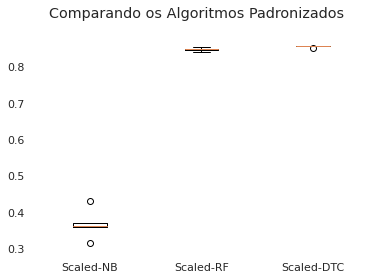

In [ ]:
# De acordo com os resultados anteriores, os modelos criados com DecisionTree e Random Forest apresentaram 
# os melhores valores de acurácia e portanto os melhores resultados.
# Isso pode ser confirmado, comparando os algoritmos através de boxplots.
fig = plt.figure()
fig.suptitle('Comparando os Algoritmos Padronizados')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [70]:
# Preparando a versão final do modelo.
scaler = StandardScaler()
previsores = scaler.fit_transform(df)
modelo_tree = DecisionTreeClassifier(max_depth=8, criterion='gini')
modelo_tree.fit(df,classes)
result_tree = cross_val_predict(modelo_tree,df, classes, cv=10)

print(f'Acurácia: {accuracy_score(classes,result_tree)}')
print('\n',confusion_matrix(classes,result_tree))
print('\n',classification_report(classes,result_tree))

Acurácia: 0.8560869743253757

 [[35250  1905]
 [ 5124  6563]]

               precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91     37155
        >50K       0.78      0.56      0.65     11687

    accuracy                           0.86     48842
   macro avg       0.82      0.76      0.78     48842
weighted avg       0.85      0.86      0.85     48842



# Salvando o modelo em disco.

In [75]:
pickle.dump(modelo_tree, open('/content/drive/MyDrive/CienciaDados/ModExtra1/modelo.sav', 'wb'))
pickle.load(open('/content/drive/MyDrive/CienciaDados/ModExtra1/modelo.sav', 'rb'))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')